<a href="https://colab.research.google.com/github/afham123/Deep-Learning-Project/blob/main/Practice_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving cancer_classification.csv to cancer_classification.csv


In [3]:
df=pd.read_csv('cancer_classification.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

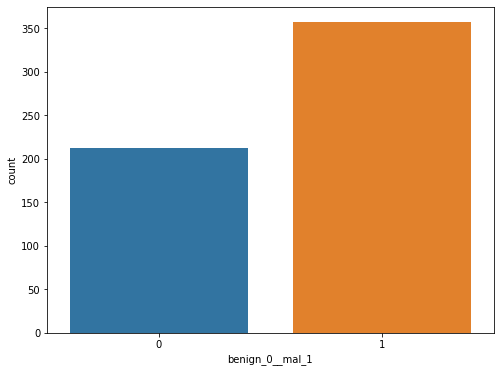

In [8]:
plt.figure(figsize=(8,6))
sns.countplot(x='benign_0__mal_1',data=df)

In [6]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'benign_0__mal_1'],
      dtype='object')

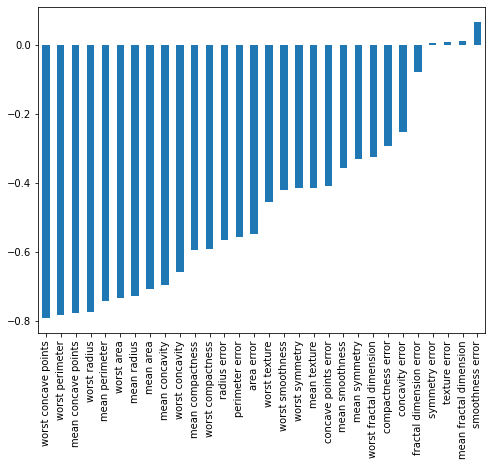

In [14]:
plt.figure(figsize=(8,6))
df.corr()['benign_0__mal_1'].sort_values()[:-1].plot(kind='bar')

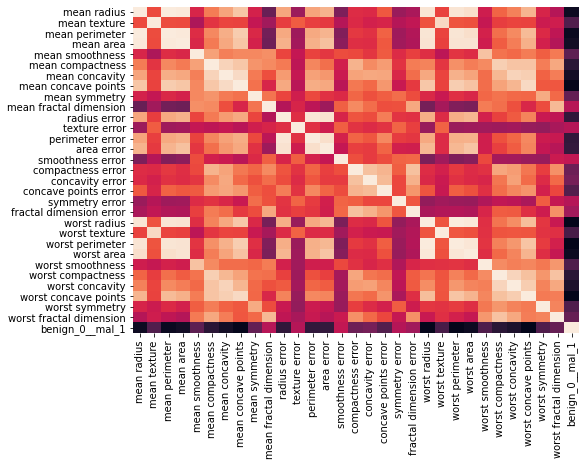

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),cbar=False)

In [19]:
X=df.drop('benign_0__mal_1',axis=1)
y=df['benign_0__mal_1']

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=101,test_size=0.3)

In [22]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
model=Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(7,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))


model.compile(loss='binary_crossentropy',optimizer='adam')

In [25]:
X_train.shape

(398, 30)

In [40]:
model.fit(X_train,y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
13/13 [==============================] - 0s 9ms/step - loss: 0.0042 - val_loss: 0.8135
Epoch 2/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0057 - val_loss: 0.8141
Epoch 3/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0029 - val_loss: 0.8145
Epoch 4/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0058 - val_loss: 0.8169
Epoch 5/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.8189
Epoch 6/600
13/13 [==============================] - 0s 16ms/step - loss: 0.0015 - val_loss: 0.8204
Epoch 7/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0030 - val_loss: 0.8214
Epoch 8/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0016 - val_loss: 0.8228
Epoch 9/600
13/13 [==============================] - 0s 5ms/step - loss: 9.8903e-05 - val_loss: 0.8243
Epoch 10/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0029 - val_loss: 0.8253
Epoc

In [41]:
predictions=model.predict_classes(X_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [42]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [43]:
print("Classification Report \n",classification_report(y_test,predictions))
print('\n')
print('Confusion Metrics \n',confusion_matrix(y_test,predictions))
print('\n')
print('Accuracy of model \n',accuracy_score(y_test,predictions))


Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.95      0.96        66
           1       0.97      0.98      0.98       105

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



Confusion Metrics 
 [[ 63   3]
 [  2 103]]


Accuracy of model 
 0.9707602339181286


In [46]:
loss_df=pd.DataFrame(model.history.history)
loss_df.head()

""


In [50]:
model=Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(7,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))


model.compile(loss='binary_crossentropy',optimizer='adam')

In [52]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [53]:
model.fit(X_train,y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
13/13 [==============================] - 1s 15ms/step - loss: 0.5838 - val_loss: 0.5073
Epoch 2/600
13/13 [==============================] - 0s 5ms/step - loss: 0.5075 - val_loss: 0.4431
Epoch 3/600
13/13 [==============================] - 0s 5ms/step - loss: 0.4332 - val_loss: 0.3757
Epoch 4/600
13/13 [==============================] - 0s 4ms/step - loss: 0.3834 - val_loss: 0.3154
Epoch 5/600
13/13 [==============================] - 0s 5ms/step - loss: 0.3407 - val_loss: 0.2641
Epoch 6/600
13/13 [==============================] - 0s 5ms/step - loss: 0.2816 - val_loss: 0.2223
Epoch 7/600
13/13 [==============================] - 0s 5ms/step - loss: 0.2448 - val_loss: 0.1912
Epoch 8/600
13/13 [==============================] - 0s 5ms/step - loss: 0.2019 - val_loss: 0.1695
Epoch 9/600
13/13 [==============================] - 0s 5ms/step - loss: 0.1763 - val_loss: 0.1547
Epoch 10/600
13/13 [==============================] - 0s 5ms/step - loss: 0.1388 - val_loss: 0.1416
Epoch 11

In [55]:
loss_df=pd.DataFrame(model.history.history)
loss_df.head()

,loss,val_loss
0,0.568094,0.507322
1,0.486019,0.443086
2,0.428710,0.375662
3,0.365274,0.315420
4,0.339068,0.264075


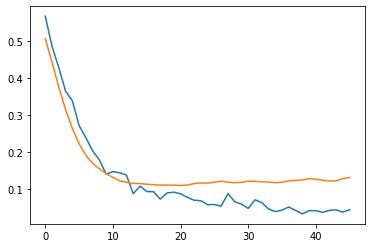

In [56]:
plt.plot(loss_df)

In [57]:
predictions=model.predict_classes(X_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [58]:
print("Classification Report \n",classification_report(y_test,predictions))
print('\n')
print('Confusion Metrics \n',confusion_matrix(y_test,predictions))
print('\n')
print('Accuracy of model \n',accuracy_score(y_test,predictions))

Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        66
           1       0.97      0.95      0.96       105

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



Confusion Metrics 
 [[ 63   3]
 [  5 100]]


Accuracy of model 
 0.9532163742690059
